# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [1]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [2]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore your tasks are as follows:
  - (2) Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - (2) Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - (2) Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.

Fragen:
* Sollen auch die Klassen kommentiert werden? Müssen noch mehr line comments hinzugefügt werden?
* Es gibt bisher nur eine einzige Print-Ausgabe, sollen wir weitere hinzufügen? Falls ja: Sollen diese sowohl oben als auch weiter untern im Code machen?
* Sollen wir nur in den Klassen weiter untern das varbose hinzufügen oder sollen wir die Oprimierung weiter oben auch in eine extra Funktion packen und dann ein varbose hinzufügen?

0 0.9388
1 0.955
2 0.9602
3 0.965
4 0.9679
5 0.9685
6 0.9707
7 0.9717
8 0.9726
9 0.9738


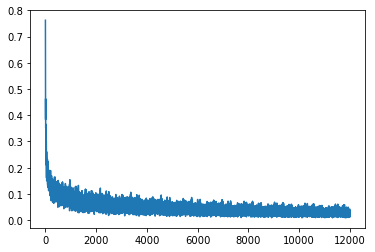

In [18]:
delta_hist =[]

def feed_forward(X, weights):
    """Calculate the outputs of all layer of the network.

    Calculates the outputs of all layers of the network given 
    the inputs X and the weights. As activation function ReLU 
    is used.

    Args:
        X: The input values of the network.
        weights: The weights of all layers of the network.

    Returns:
       A numpy.array containing the outputs of all layers of 
       the network.
    """
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0))
    return a

def grads(X, Y, weights):
    """Calculate the gradients of the weights of the network.

    Calculate the gradients of the weights of the network given 
    the inputs X, the labels of the inputs Y and the weights. 
    Therefor the quadratic cost function is used.
    
    Args:
        X: The input values of the network.
        Y: The labels of the input values of the network.
        weights: The weights of all layers of the network.

    Returns:
       A numpy.array containing all gradients of the weights 
       of the network.
    """
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y # why not * (a[i] > 0) bzw. * (z[i] > 0)?
    delta_hist.append(np.sum(delta*Y)/len(X))  # why np.sum(delta*Y)/len(X) and not np.sum((Y - a[-1])*(Y - a[-1]))/(len(X)*2)?
    grads[-1] = a[-2].T.dot(delta)
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T) # why not * (z[i] > 0)?
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X) # why / len(x)

trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
# weights inistalisation with gaussian normal distribution values
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]

num_epochs, batch_size, learn_rate = 20, 50, 0.1

for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
        once = False
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    print (i, np.mean(prediction_test == np.argmax(teY, axis=1)))
plt.plot(delta_hist)

## Todo: Comprehension
Hopefully, this implementation of a neural network is clear now. As a check answer the following questions (a few sentences, no novels):
  - (2) Which cost function is used, what is its derivation and how is it implemented?
      * Quadratic cost functionis used and the derivation is ... . It is implemeted as ```delta = a[-1] - Y ``` where ```a``` contains the output values of all layers of the network; except the values of the index ```0```: these are the input values of the network. The index ```-1``` means that the outputs of the last layer of the network are used. ```Y``` are the exact values ```a[-1]``` should have if the model would work perfectly. 
  - (2) Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
      * It is so noisy because of SGD(?). Another optimisation algorithm could be used.
      * The difference is that not the regular formular for the quadratic cost function is used to calculate the values but a different. Normal would be ```np.sum((Y - a[-1])*(Y - a[-1]))/(len(X)*2)``` but used is ```np.sum(delta*Y)/len(X)```.
  - (2) How does the network implement the backpropagation algorithm? 

Fragen
* zur 2.
    * Wieso werden die Werte folgendermaßen berechnet: ```np.sum(delta*Y)/len(X)``` und nicht so: ```np.sum((Y - a[-1])*(Y - a[-1]))/(len(X)*2)```?
* zur 3.
    * Wie ist das gemeint?

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of exercise 03. 

(5) Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

Fragen
* Soll die sgd() Funktion direkt in der init() aufgerufen werden, oder sollen wir den Code weiter untern noch erweitern, obwohl dort steht, dass er so funktionieren sollte.

0 0.8676
1 0.9002
2 0.913
3 0.9215
4 0.9293
5 0.9354
6 0.9388
7 0.943
8 0.945
9 0.9471
10 0.9491
11 0.951
12 0.9523
13 0.9539
14 0.9554
15 0.9557
16 0.9559
17 0.9566
18 0.957
19 0.9582


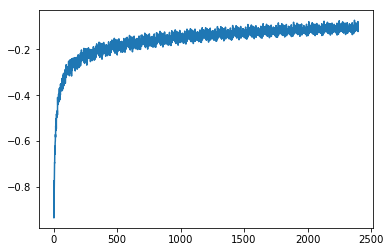

In [15]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.randn(*layer) * 0.1 for layer in self.layers]
        self.a = None
        self.grads = None
        self.delta_hist = []
        
    def forward(self, data):
        """Calculates the outputs of all layer of the network.

        Calculates the outputs of all layers of the network for 
        the given data. As activation function ReLU is used.

        Args:
            data: The input values of the network.

        Returns:
           A numpy.array containing the outputs of all layers of 
           the network.
        """    
        a = [data]
        for w in self.weights:
            a.append(self.relu(a[-1].dot(w)))
        return a

    def backward(self, X, Y):
        """Calculates the gradients of the weights of the network.

        Calculates the gradients of the weights of the network given 
        the inputs X and the labels of the inputs Y. Therefor the 
        quadratic cost function is used.
    
        Args:
            X: The input values of the network.
            Y: The labels of the input values of the network.

        Returns:
           A numpy.array containing all gradients of the weights 
           of the network.
        """
        self.grads = np.empty_like(self.weights)
        self.a = self.forward(X)
        delta = self.a[-1] - Y 
        self.delta_hist.append(np.sum(delta*Y)/len(X))
        self.grads[-1] = self.a[-2].T.dot(delta)
        
        for i in range(len(self.a) - 2, 0, -1):
            delta = self.relu_prime(self.a[i]) * delta.dot(self.weights[i].T)
            self.grads[i-1] = self.a[i-1].T.dot(delta)
        
        return self.grads / len(X)

    def predict(self, data):
        """Predicts the labels for given data.

        Predicts the labels for the given data.
    
        Args:
            data: The data which labels are predicted for.

        Returns:
           A numpy.array containing all labels as indices.
        """
        return np.argmax(self.forward(data)[-1], axis=1)
    
    def relu(self, data):
        """Calculates the activation values for the ReLU function.

        Calculates the activation values for the ReLU function for 
        the given data.
    
        Args:
            data: The data which the activation values are 
            calculated for.

        Returns:
           A numpy.array containing all activation values.
        """
        return np.maximum(data, 0)
    
    def relu_prime(self, data):
        """Calculates the gradients for the ReLU function.

        Calculates the gradients for the ReLU function given 
        the wighted inputs. 
    
        Args:
            data: The data which the gradients are 
            calculated for.

        Returns:
           A numpy.array containing all gradients.
        """
        return (data > 0)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01, verbose=False):
        self.network = network
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.sgd(verbose)
        
    def sgd(self, verbose=False):
        """Optimizes a network using SGD.

        Optimizes a network using SGD. 
    
        Args:
            verbose: If True information about the process are 
            printed during the optimisation.
        """
        for i in range(self.epochs):
            for j in range(0, len(self.train_data), self.batch_size):
                X, Y = self.train_data[j:j+self.batch_size], self.train_labels[j:j+self.batch_size]
                self.network.weights -= self.learning_rate * self.network.backward(X, Y)
            if verbose:
                print(i, np.mean(self.network.predict(self.test_data) == np.argmax(self.test_labels, axis=1)))

    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 20, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate, True)
plt.plot(mnist_NN.delta_hist)